In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import numpy as np

In [8]:
import torch
from torch.autograd import Variable
from torch.nn import Parameter
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

In [3]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.bias = Parameter(torch.rand(20))

    def forward(self, x):
        x = x + self.bias.unsqueeze(0).expand_as(x)
        return x

model = Net()
model = model.double()

In [4]:
criterion = nn.MSELoss()

In [5]:
input = Variable(torch.from_numpy(np.ones((5,20))))

In [6]:
target = Variable(torch.from_numpy(np.ones((5,20))*5))

In [15]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [16]:
t = tqdm(range(2500))
losses = []
for _ in t:
    loss = criterion(model(input), target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.data.numpy()[0])

100%|██████████| 2500/2500 [00:00<00:00, 6016.01it/s]


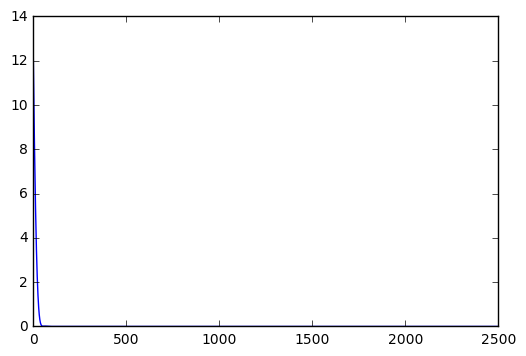

In [17]:
plot(losses)

In [19]:
list(model.parameters())

[Parameter containing:
  4.0000
  4.0000
  4.0000
  4.0000
  4.0000
  4.0000
  4.0000
  4.0000
  4.0000
  4.0000
  4.0000
  4.0000
  4.0000
  4.0000
  4.0000
  4.0000
  4.0000
  4.0000
  4.0000
  4.0000
 [torch.DoubleTensor of size 20]]